# Visualizing Earnings Based on College Majors #


In this project, we are woring with the dataset on the job outcomes of students who graduated from college between 2010 and 2012. American Community Survey conducted surveys and aggregrate the data on job outcomes. 
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads= pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [3]:
raw_data_count = len(recent_grads)

In [4]:
recent_grads = recent_grads.dropna()

In [5]:
cleaned_data_count = len(recent_grads)

In [6]:
print(raw_data_count)
print(cleaned_data_count)

173
172


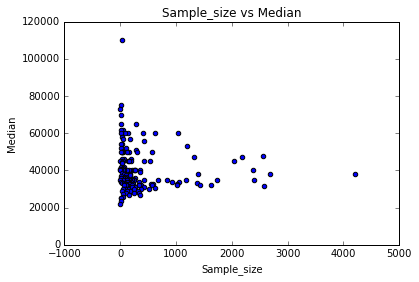

In [7]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind ='scatter', title = 'Sample_size vs Median')

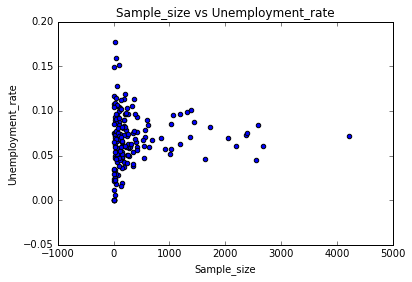

In [8]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind ='scatter', title = 'Sample_size vs Unemployment_rate')

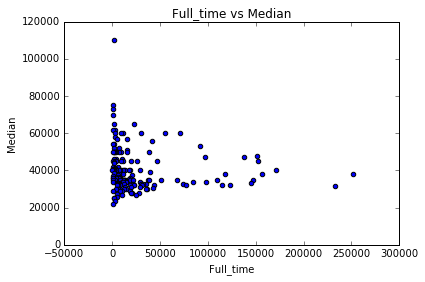

In [9]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind ='scatter', title = 'Full_time vs Median')

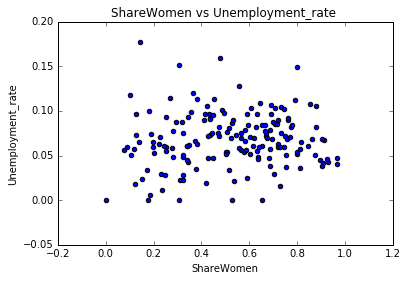

In [10]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind ='scatter', title = 'ShareWomen vs Unemployment_rate ')

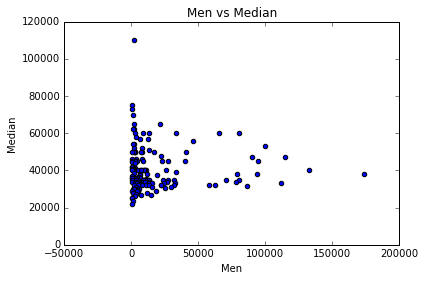

In [11]:
recent_grads.plot(x = 'Men', y = 'Median', kind ='scatter', title = 'Men vs Median')

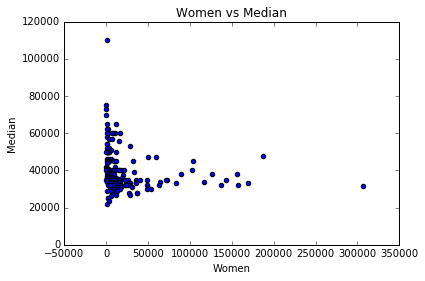

In [12]:
recent_grads.plot(x = 'Women', y = 'Median', kind ='scatter', title = 'Women vs Median')

By looking at the scatter plots, students do not make more moeny in more popular majors, including majority female.
There is no link between the number of full-time employees and median salary.


** Generating Histograms **


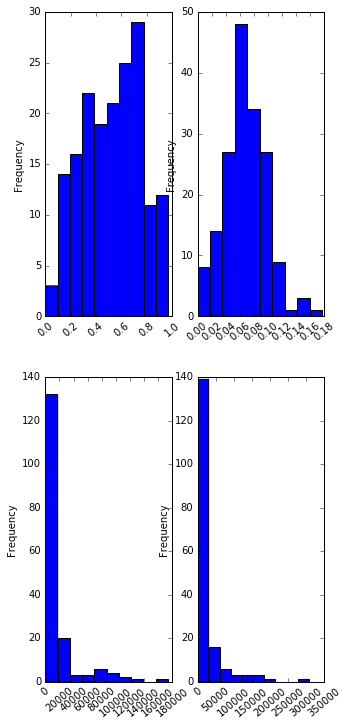

In [13]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)


- Around 20 percent of majors are predominantly male.
- Around 20 percent of majors are predominantly female.
- The most commen median salary range is bettween 30000 to 40000.

** ScatterMatrix Plot **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f66303780>,
      dtype=object)

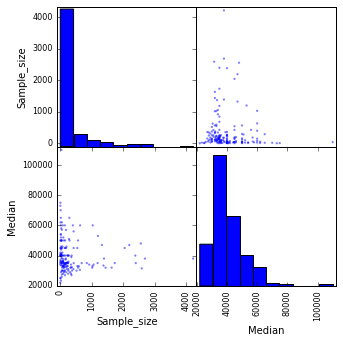

In [14]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize = (5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f660664e0>,
      dtype=object)

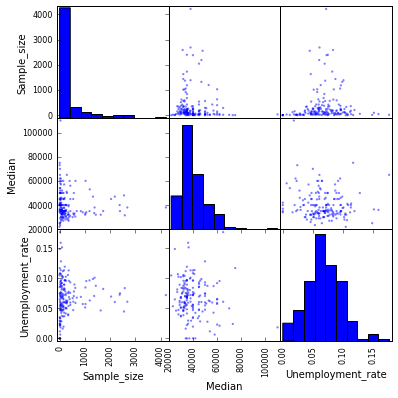

In [15]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize = (6,6))

** Bar plots **

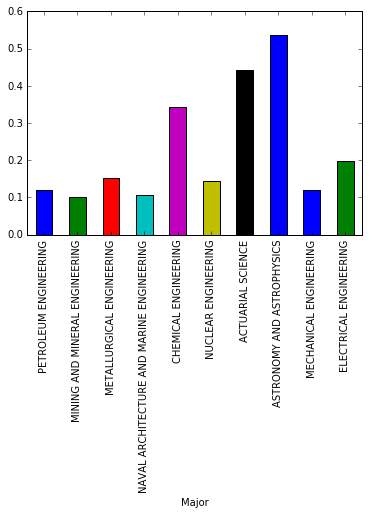

In [16]:
recent_grads[:10].plot(x ='Major', y ='ShareWomen', legend=False, kind= 'bar')

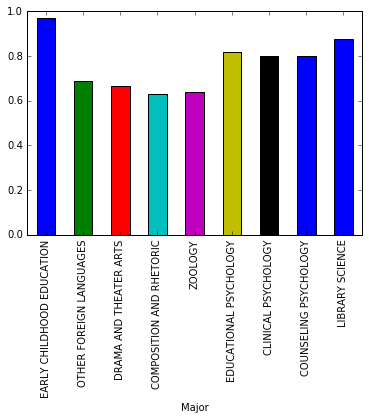

In [17]:
recent_grads[163:].plot(x ='Major', y ='ShareWomen', legend=False, kind= 'bar')

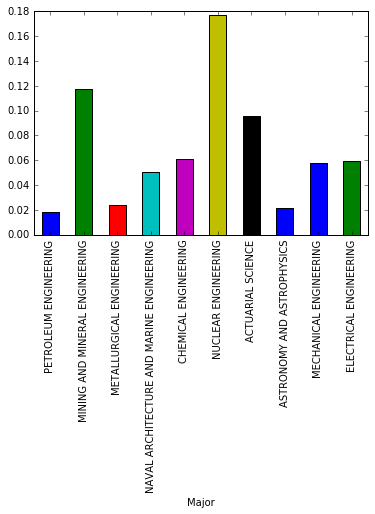

In [18]:
recent_grads[:10].plot(x ='Major', y ='Unemployment_rate', legend=False, kind= 'bar')

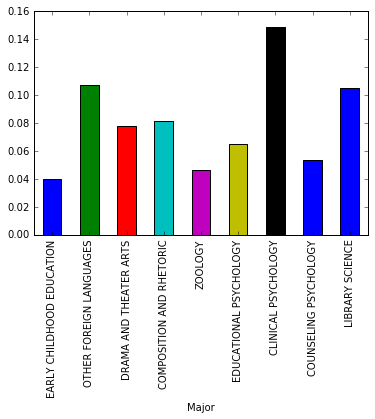

In [19]:
recent_grads[163:].plot(x ='Major', y ='Unemployment_rate', legend=False, kind= 'bar')

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



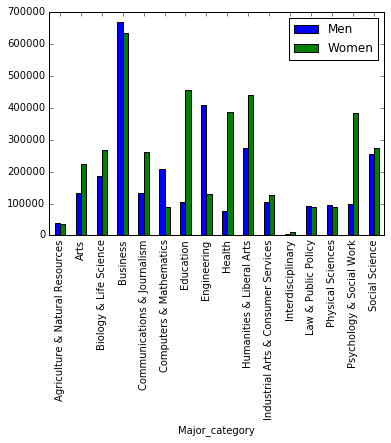

In [20]:
gb = recent_grads.pivot_table(index='Major_category', values=['Men', 'Women'],aggfunc = np.sum)
gb.plot.bar(x = gb.index, y =['Men','Women'])

**Box plot to explore the distribution of median salaries and unemployment rate**

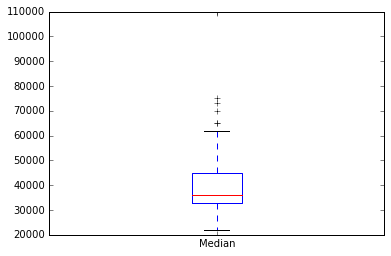

In [25]:
recent_grads['Median'].plot.box()

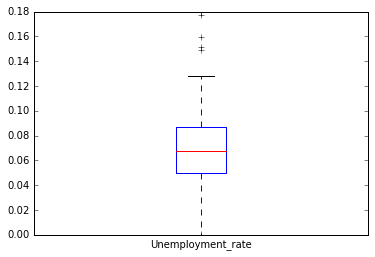

In [27]:
recent_grads['Unemployment_rate'].plot.box()

_Findings_
- Majority of Recent Graduated Students are making around 35000 to 50000.
- The range of Umemployment rate for Recent Graduated Students is bettween 0 to 12 percent.
- The median Unemployment rate is 7 percent.
- The bottom 25 percent and top 25 percent are bettween 0 to 4 percent and 8 percent to 13 percent respectively.
- Majority of Unemployment are bettween 5 percent to 10 percent.

**Hexagonal Bin plot**

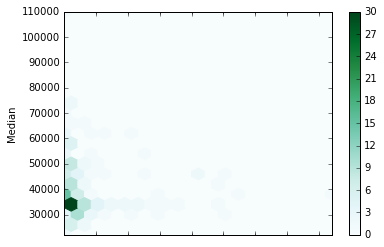

In [28]:
recent_grads.plot.hexbin(x='Sample_size', y='Median', gridsize=20)

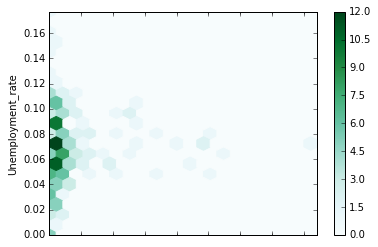

In [29]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=20)